# Import thư viện cần thiết

In [1]:
#bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')
#thư viện toán học cho hàm toán học
import math
#dùng để đọc dữ liệu
import pandas as pd
#giúp xử lý số liệu
import numpy as np
#dùng để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
#cài keras - thư viện mạng thần kinh for LSTM
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
#dùng để vẽ biểu đồ 
import matplotlib.pyplot as mtlplt
mtlplt.style.use("fivethirtyeight")
%matplotlib inline
from matplotlib import rcParams 
import tkinter
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)

# Lấy data từ file

In [2]:
file = 'VNINDEX.csv' #dữ liệu được tải về từ trang tradingview.com được niêm yết trên thị trường chứng khoán VN
df = pd.read_csv(file,parse_dates=True,index_col=0)
data = df.reset_index('Date') #đặt cột Date làm chỉ mục
data

,Date,Open,High,Low,Close,Volume,Open Interest
0,2016-01-04,579.03,579.97,573.15,574.41,9.590000e+07,41926
1,2016-01-05,571.66,575.40,569.26,569.94,9.800000e+07,42607
2,2016-01-06,569.50,574.57,569.50,574.57,8.230000e+07,37738
3,2016-01-07,570.62,570.94,561.09,565.36,1.410000e+08,59811
4,2016-01-08,562.62,563.17,556.36,560.05,1.340000e+08,51162
...,...,...,...,...,...,...,...
1501,2022-01-04,1508.55,1526.69,1507.19,1525.58,8.400000e+08,0
1502,2022-01-05,1529.06,1535.82,1522.50,1522.50,9.870000e+08,0
1503,2022-01-06,1519.72,1536.24,1518.18,1528.57,1.110000e+09,0
1504,2022-01-07,1534.10,1534.52,1524.96,1528.48,9.520000e+08,0


# Lấy số lượng cột và hàng

In [3]:
df.shape

(1506, 6)

# Vẽ biểu đồ từ dữ liệu

<function matplotlib.pyplot.show(close=None, block=None)>

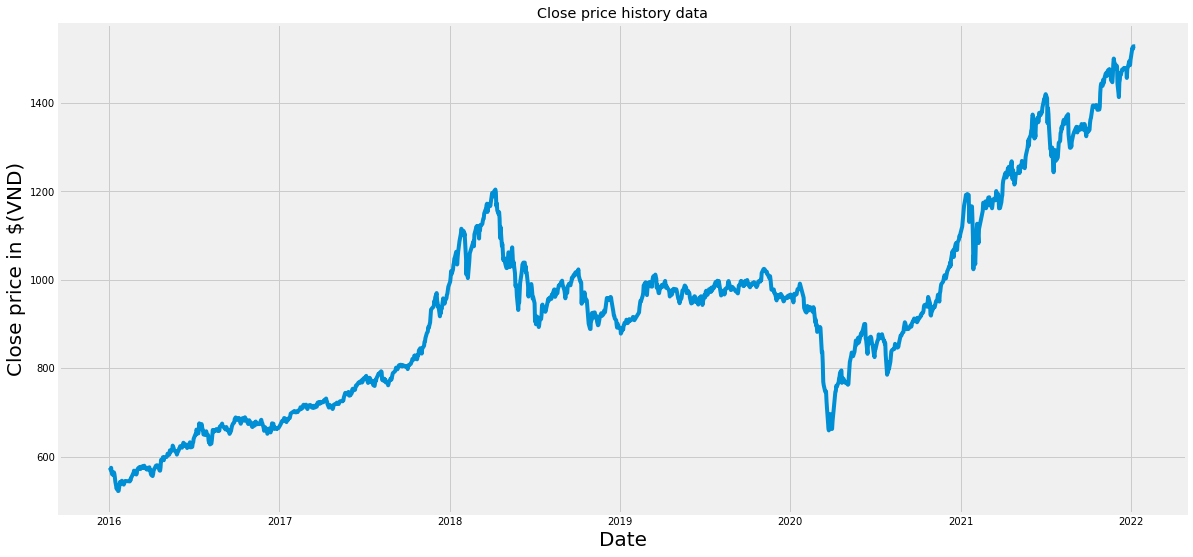

In [4]:
#Đây là biểu đồ giá đóng cửa của data từ khoảng thời gian 1/4/2016 đến 10/1/2022
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(df['Close']) 
mtlplt.xlabel('Date', fontsize=20) #trục x biễu diễn cột Date
mtlplt.ylabel('Close price in $(VND)',fontsize=20) #trục y biểu diễn giá đóng trong ngày
mtlplt.show

# Tiền xử lý tập dữ liệu

In [5]:
#Tạo dataframe chỉ có cột giá đóng
stock_close_data = df.filter(['Close'])

#chuyển đổi dataframe đã tạo thành mảng numpy bằng hàm values
stock_close_dataset = stock_close_data.values

#chia dữ liệu thành tập train and test(train chiếm 80% data và test 20% còn lại của data)
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

#hiển thị độ dài tập trai
trainingDataLength

1205

In [6]:
#Scale dữ liệu về dạng 0,1 giúp model train nhanh hơn. 
#Lstm hoạt động tốt hơn khi các giá trị đầu vào được chia tỷ lệ thành phạm vi tiêu chuẩn
scaler = MinMaxScaler(feature_range=(0,1))

#tiến hành scale dữ liệu bằng fit.trainsform
scaledData = scaler.fit_transform(stock_close_dataset)

#hiển thị giá trị dữ liệu được chia
scaledData.shape

(1506, 1)

In [7]:
#tạo tập dữ liệu mới chứa giá trị giá trị scale có kích thước từ 0 đến kích thươc dữ liệu 80% ở trên
StockTrainData = scaledData[0:trainingDataLength , :]

#tách dữ liệu thành 2 phần Xtrain và Ytrain
Xtrain = []
Ytrain = []
#tiến hành tạo dữ lieu cho xtrain và ytrain bằng vòng lặp trong phạm vi từ 60 đến tổng kích thước dữ liệu huấn luyện
#tạo dữ liệu với timestep=60 ngày, xem xét dữ liệu quá khứ để đoán ra ngày 61 
for i in range(60, len(StockTrainData)):
  Xtrain.append(StockTrainData[i-60:i, 0])
  Ytrain.append(StockTrainData[i, 0])
  if i<= 61:
    print(Xtrain)
    print(Ytrain)
    print()

[array([0.05218039, 0.04774014, 0.05233933, 0.04319062, 0.03791596,
       0.03575047, 0.04209794, 0.03823383, 0.03094268, 0.02101917,
       0.00446012, 0.01379756, 0.00750969, 0.        , 0.0003576 ,
       0.02033376, 0.01574451, 0.0206715 , 0.01747293, 0.02321446,
       0.01855568, 0.01447303, 0.01707559, 0.02013509, 0.02271779,
       0.02176418, 0.02599583, 0.02500248, 0.03040628, 0.03193603,
       0.03857157, 0.03913778, 0.04585279, 0.04066753, 0.04393563,
       0.03724049, 0.03941591, 0.04797854, 0.04818715, 0.05142545,
       0.05395848, 0.05247839, 0.04949836, 0.05367041, 0.05501142,
       0.05572663, 0.05181285, 0.05482269, 0.05699811, 0.05358101,
       0.05005463, 0.04870369, 0.05247839, 0.04845535, 0.0498659 ,
       0.05348167, 0.04609119, 0.04771034, 0.03907818, 0.03630674])]
[0.0337141154266416]

[array([0.05218039, 0.04774014, 0.05233933, 0.04319062, 0.03791596,
       0.03575047, 0.04209794, 0.03823383, 0.03094268, 0.02101917,
       0.00446012, 0.01379756, 0.007

In [8]:
#chuyển đổi dữ liệu Xtrain, dữ liệu Ytrain thành mảng numpy 
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [9]:
#định hình lại dữ liệu Xtrain cho phù hợp với dữ liệu đầu vào thành dạng 3D và 1 đối tượng đại diện giá đóng cửa
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(1145, 60, 1)

# Tạo model và xây dựng mô hình LSTM

In [10]:
#khởi tạo model
model = Sequential()

neurons = 50

#lớp LSTM đầu
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

#lớp LSTM thứ 2, không còn lớp nào cho lstm nên return_sequences= False
model.add(LSTM(neurons, return_sequences= False)) 

#thêm lớp nơron dày đặc
model.add(Dense(25)) 
model.add(Dense(1))

In [11]:
#biên dịch model
model.compile(optimizer='adam', loss='mse') 

In [12]:
#đào tạo với tập Xtrain, Ytrain đã cho
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2) 

Epoch 1/200
23/23 - 4s - loss: 0.0253 - 4s/epoch - 171ms/step
Epoch 2/200
23/23 - 1s - loss: 0.0025 - 915ms/epoch - 40ms/step
Epoch 3/200
23/23 - 1s - loss: 9.5359e-04 - 876ms/epoch - 38ms/step
Epoch 4/200
23/23 - 1s - loss: 6.8502e-04 - 875ms/epoch - 38ms/step
Epoch 5/200
23/23 - 1s - loss: 6.5526e-04 - 874ms/epoch - 38ms/step
Epoch 6/200
23/23 - 1s - loss: 6.3920e-04 - 890ms/epoch - 39ms/step
Epoch 7/200
23/23 - 1s - loss: 6.3630e-04 - 940ms/epoch - 41ms/step
Epoch 8/200
23/23 - 1s - loss: 5.9581e-04 - 1s/epoch - 44ms/step
Epoch 9/200
23/23 - 1s - loss: 5.9744e-04 - 875ms/epoch - 38ms/step
Epoch 10/200
23/23 - 1s - loss: 5.5503e-04 - 854ms/epoch - 37ms/step
Epoch 11/200
23/23 - 1s - loss: 5.3953e-04 - 866ms/epoch - 38ms/step
Epoch 12/200
23/23 - 1s - loss: 5.0817e-04 - 855ms/epoch - 37ms/step
Epoch 13/200
23/23 - 1s - loss: 4.8169e-04 - 889ms/epoch - 39ms/step
Epoch 14/200
23/23 - 1s - loss: 4.6714e-04 - 831ms/epoch - 36ms/step
Epoch 15/200
23/23 - 1s - loss: 4.5993e-04 - 837ms/epoch

23/23 - 1s - loss: 1.1105e-04 - 1s/epoch - 48ms/step
Epoch 122/200
23/23 - 1s - loss: 1.0115e-04 - 1s/epoch - 47ms/step
Epoch 123/200
23/23 - 1s - loss: 1.0950e-04 - 1s/epoch - 45ms/step
Epoch 124/200
23/23 - 1s - loss: 9.8606e-05 - 1s/epoch - 47ms/step
Epoch 125/200
23/23 - 1s - loss: 1.0693e-04 - 1s/epoch - 45ms/step
Epoch 126/200
23/23 - 1s - loss: 1.1181e-04 - 1s/epoch - 45ms/step
Epoch 127/200
23/23 - 1s - loss: 1.1195e-04 - 989ms/epoch - 43ms/step
Epoch 128/200
23/23 - 1s - loss: 1.1384e-04 - 983ms/epoch - 43ms/step
Epoch 129/200
23/23 - 1s - loss: 1.0336e-04 - 998ms/epoch - 43ms/step
Epoch 130/200
23/23 - 1s - loss: 1.5500e-04 - 1s/epoch - 46ms/step
Epoch 131/200
23/23 - 1s - loss: 1.1472e-04 - 1s/epoch - 47ms/step
Epoch 132/200
23/23 - 1s - loss: 1.0767e-04 - 1s/epoch - 48ms/step
Epoch 133/200
23/23 - 1s - loss: 1.1726e-04 - 1s/epoch - 47ms/step
Epoch 134/200
23/23 - 1s - loss: 1.0786e-04 - 1s/epoch - 46ms/step
Epoch 135/200
23/23 - 1s - loss: 9.9882e-05 - 1s/epoch - 47ms/step


# Xây dựng tập thử nghiệm test

In [13]:
#tạo tập dữ liệu test với timestep=60 ngày tương tự như tập train
testingData = scaledData[trainingDataLength - 60: , :]

#tạo tập Xtest và Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
  Xtest.append(testingData[i-60:i, 0])

In [14]:
#chuyển dữ liệu Xtest thành mảng numpy
Xtest = np.array(Xtest)
Xtest

array([[0.31381742, 0.31604252, 0.31745306, ..., 0.42606536, 0.42176418,
        0.39651336],
       [0.31604252, 0.31745306, 0.31918148, ..., 0.42176418, 0.39651336,
        0.39455647],
       [0.31745306, 0.31918148, 0.31906228, ..., 0.39651336, 0.39455647,
        0.40090394],
       ...,
       [0.86423959, 0.86417999, 0.86502434, ..., 0.96990166, 0.99701997,
        0.99396046],
       [0.86417999, 0.86502434, 0.8678355 , ..., 0.99701997, 0.99396046,
        0.99999007],
       [0.86502434, 0.8678355 , 0.86763683, ..., 0.99396046, 0.99999007,
        0.99990067]])

In [15]:
#Reshape dữ liệu 
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [16]:
#Chuyển đổi về dạng giá thông thường mà ta đọc được 
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 927.2377 ],
       [ 921.9021 ],
       [ 928.9541 ],
       [ 939.4986 ],
       [ 943.3744 ],
       [ 947.7892 ],
       [ 945.86414],
       [ 945.33514],
       [ 958.2304 ],
       [ 959.85925],
       [ 959.5643 ],
       [ 965.84485],
       [ 973.3145 ],
       [ 958.52167],
       [ 973.7503 ],
       [ 980.8682 ],
       [ 991.07544],
       [ 998.4623 ],
       [1002.56854],
       [1003.5949 ],
       [1007.1138 ],
       [1013.13904],
       [1017.729  ],
       [1010.434  ],
       [1015.12744],
       [1021.31964],
       [1027.5192 ],
       [1029.5227 ],
       [1037.9082 ],
       [1037.4242 ],
       [1046.8967 ],
       [1038.6843 ],
       [1052.9889 ],
       [1073.0889 ],
       [1064.5887 ],
       [1074.8469 ],
       [1058.7678 ],
       [1073.6299 ],
       [1089.431  ],
       [1092.5823 ],
       [1086.8062 ],
       [1073.4252 ],
       [1090.615  ],
       [1099.5885 ],
       [1108.5583 ],
       [1106.0469 ],
       [1111.7372 ],
       [1129.

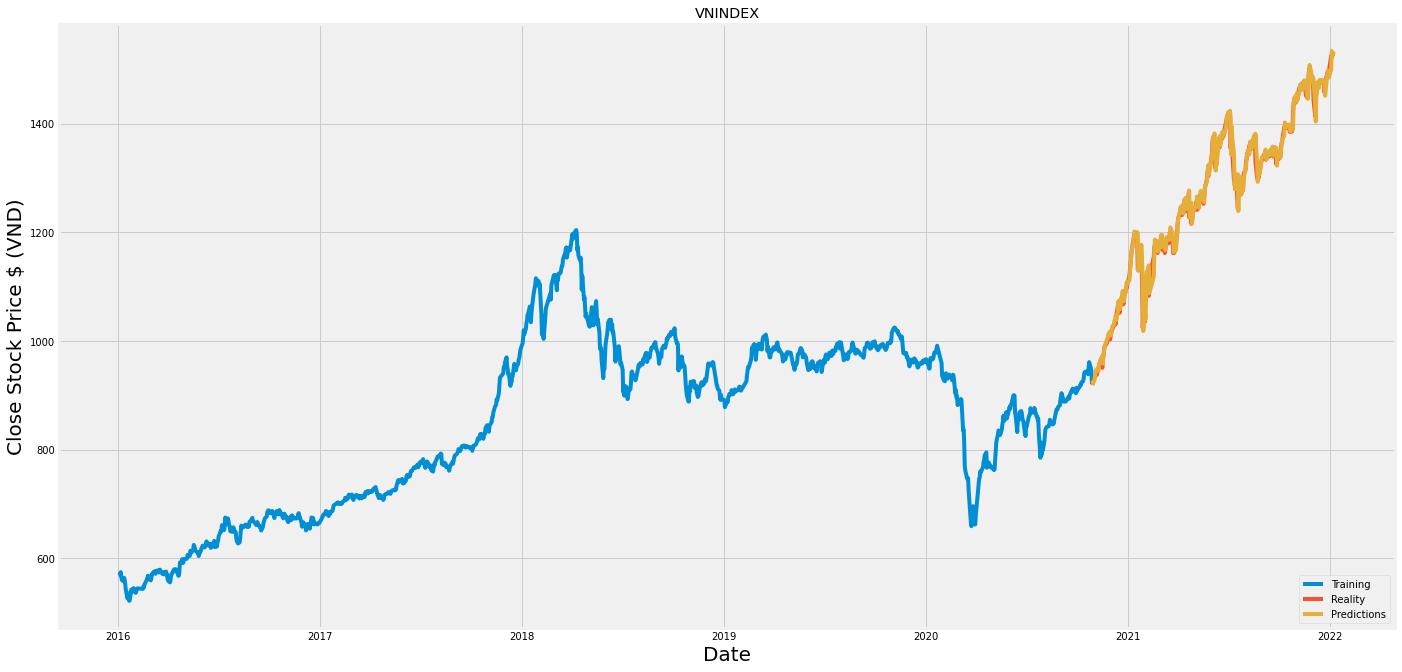

In [17]:
#vẽ biểu đồ để biễu diễn dự đoán 
#chia tệp data thành tập train và reality sau đó xây dựng tệp predictions để so sánh 
training = stock_close_data[:trainingDataLength]
reality= stock_close_data[trainingDataLength:]
reality['Predictions'] = predictions

root = tkinter.Tk()
fig = mtlplt.figure(figsize=(20,10))
mtlplt.title('VNINDEX')
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close Stock Price $ (VND)', fontsize=20)
mtlplt.plot(training['Close'])
mtlplt.plot(reality[['Close', 'Predictions']])
mtlplt.legend(['Training', 'Reality', 'Predictions'], loc='lower right')
canvas = FigureCanvasTkAgg(fig, master=root) 
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

root.geometry('1400x900')
root.mainloop()

In [18]:
#Show dữ liệu Close và Predictions
reality

,Close,Predictions
Date,,
2020-10-29,919.08,927.237671
2020-10-30,925.47,921.902100
2020-11-02,933.68,928.954102
2020-11-03,935.41,939.498596
2020-11-04,939.76,943.374390
...,...,...
2022-01-04,1525.58,1501.225342
2022-01-05,1522.50,1533.809448
2022-01-06,1528.57,1523.574585


In [19]:
#In kết quả của giá đóng và giá dự đoán ra file csv
reality.to_csv('Ketquadubao.csv')

In [20]:
mae = np.mean(np.abs(Ytest - predictions ))
print(mae)

10.976505058009758


In [21]:
rmse = np.sqrt(np.mean((Ytest - predictions) ** 2))
print(rmse)

16.220610157234482


In [22]:
#tính độ chính xác của dự báo
mape = np.mean(np.abs((Ytest - predictions )/ Ytest)) *100
print(mape)

0.8821154450824719
